In [6]:
import pandas as pd
import os
os.chdir('c:\\datacamp\\data\\')

# Writing Functions in Python

## Chapter 1 - Best Practices

### Docstrings

As a best practice, including docstrings in your custom functions makes the code much easier to use, read and maintain. Consider the complex function below, as is, the reader would have to spend some time deciphering the code. 

In [1]:
def split_and_stack(df, new_names):
    half = int(len(df.columns)/2)
    left = df.iloc[:, :half]
    right = df.iloc[:, half:]
    return pd.DataFrame(data = np.vstack([left.values, right.values]), columns = new_names)

With a docstring though, it is much easier to tell what the expected inputs and outputs should be as well as tells what the function does.

In [3]:
def split_and_stack(df, new_names):
    '''Split a DataFrame's columns into two halves and then stack them vertically, returning a new DataFrame with 'new_names'
    as the column names
    
    Args:
    df(DataFrame): The name of the DataFrame to split
    new_names (iterable of str): The column names for the new DataFrame
    
    Returns:
    DataFrame'''
    
    half = int(len(df.columns)/2)
    left = df.iloc[:, :half]
    right = df.iloc[:, half:]
    return pd.DataFrame(data = np.vstack([left.values, right.values]), columns = new_names)

#### Anatomy of a Docstring

A docstring is a string written as the first line of a function. Triple quotes are used to enable multiple lines of comments. It should include some if not all of the following:
> Description of what the function does<br>
> Description of the arguments, if any<br>
> Description of the return value(s), if any<br>
> Description of errors raised, if any<br>
> Optional extra notes or examples of usage<br>

#### Docstring Format Options

The Python community has developed several format styles for docstrings, with Google style and numpydoc being the most popular style:
> Google Style
> numpydoc
> reStructuredText
> EpyText

#### Google Style

In Google Style, the docstring starts with a concise description of what the function does, using imperative language: Verb action on Noun

Next comes the Args section, listing each argument and the expected type in parenthesis and what its role is in the function. 

Next section is the Returns section, listing the expected type(s) of what gets returned. 

If the function intentionally raises errors, add a Raises: section

And any additional notes or examples can be added in the final Notes section. 

In [4]:
def function(arg_1, arg_2=42):
    '''Describe the actions of the function
    Args:
        arg_1 (str): Desciption of arg_1 that can break into
            the next line if needed
        arg_2 (int, optional): Write optional when argument has a default value
    
    Returns:
        bool: Optional description of the return value
        Extra lines are not further indented
    
    Raises:
        ValueError: Include any error types the function intentionally raises
        
    Notes:
        See https://www.datacamp.com/community/tutorials/docstrings-python for more information'''

#### Numpydoc Style

This is the most common style for docstrings and is similar to the Google style. While easier to read, it takes up more vertical space and does not allow for examples to be compact. 

In [6]:
def function(arg_1, arg_2=42):
    '''
    Describe the actions of the function
    
    Parameters
    ----------
        arg_1: expected type
            Desciption of arg_1 that can break into the next line if needed
        arg_2: int, optional
            Write optional when argument has a default value
            Default=42
    
    Returns
    -------
        The type of return value
        Can include a description of the return
        Replace "Returns" with "Yield" if this is a generator'''

### Retrieving Docstrings

Sometimes it's useful for the code to access the contents of the docstring. Every function in Python comes with a double underscore doc double underscore attribute that holds this information. This attribute returns the raw docstring, including any tabs and spaces.

To get a cleaner version, removing the leading spaces and tabs, use the .getdoc() function included in the inspect module. The inspect module has a lot of useful information about functions. 

In [16]:
def the_answer():
    '''Returns the answer to life, 
    the universe and everything
    
    Returns:
        int'''
    
    return 42

print(the_answer.__doc__)

import inspect
print(inspect.getdoc(the_answer))

Returns the answer to life, 
    the universe and everything
    
    Returns:
        int
Returns the answer to life, 
the universe and everything

Returns:
    int


### Exercise 1

#### Crafting a docstring
You've decided to write the world's greatest open-source natural language processing Python package. It will revolutionize working with free-form text, the way numpy did for arrays, pandas did for tabular data, and scikit-learn did for machine learning.

The first function you write is count_letter(). It takes a string and a single letter and returns the number of times the letter appears in the string. You want the users of your open-source package to be able to understand how this function works easily, so you will need to give it a docstring. Build up a Google Style docstring for this function by following these steps.

__Instructions:__
* Copy the following string and add it as the docstring for the function: Count the number of times `letter` appears in `content`.
* Now add the arguments section, using the Google style for docstrings. Use str to indicate a string.
* Add a returns section that informs the user the return value is an int.
* Finally, add some information about the ValueError that gets raised when the arguments aren't correct.

In [19]:
# Add a docstring to count_letter()
def count_letter(content, letter):
  '''Count the number of times `letter` appears in `content`.'''
  if (not isinstance(letter, str)) or len(letter) != 1:
    raise ValueError('`letter` must be a single character string.')
  return len([char for char in content if char == letter])

In [20]:
def count_letter(content, letter):
  """Count the number of times `letter` appears in `content`.

  # Add a Google style arguments section
  Args:
    content (str): The string to search.
    letter (str): The letter to search for.
  """
  if (not isinstance(letter, str)) or len(letter) != 1:
    raise ValueError('`letter` must be a single character string.')
  return len([char for char in content if char == letter])

In [21]:
def count_letter(content, letter):
  """Count the number of times `letter` appears in `content`.

  Args:
    content (str): The string to search.
    letter (str): The letter to search for.

  # Add a returns section
  Returns:
    int
  """
  if (not isinstance(letter, str)) or len(letter) != 1:
    raise ValueError('"letter" must be a single character string.')
  return len([char for char in content if char == letter])

In [22]:
def count_letter(content, letter):
  """Count the number of times `letter` appears in `content`.

  Args:
    content (str): The string to search.
    letter (str): The letter to search for.

  Returns:
    int

  # Add a section detailing what errors might be raised
  Raises:
    ValueError: If `letter` is not a one-character string.
  """
  if (not isinstance(letter, str)) or len(letter) != 1:
    raise ValueError('`letter` must be a single character string.')
  return len([char for char in content if char == letter])

#### Retrieving docstrings
You and a group of friends are working on building an amazing new Python IDE (integrated development environment -- like PyCharm, Spyder, Eclipse, Visual Studio, etc.). The team wants to add a feature that displays a tooltip with a function's docstring whenever the user starts typing the function name. That way, the user doesn't have to go elsewhere to look up the documentation for the function they are trying to use. You've been asked to complete the build_tooltip() function that retrieves a docstring from an arbitrary function.

Note that in Python, you can pass a function as an argument to another function. I'll talk more about this in chapter 3, but it will be useful to keep in mind for this exercise.

__Instructions:__
* Begin by getting the docstring for the function count_letter(). Use an attribute of the count_letter() function.
* Now use a function from the inspect module to get a better-formatted version of count_letter()'s docstring.
* Use the inspect module again to get the docstring for any function being passed to the build_tooltip() function.

In [25]:
# Get the docstring with an attribute of count_letter()
docstring = count_letter.__doc__

border = '#' * 28
print('{}\n{}\n{}'.format(border, docstring, border))


import inspect

# Get the docstring with a function from the inspect module
docstring = inspect.getdoc(count_letter)

border = '#' * 28
print('{}\n{}\n{}'.format(border, docstring, border))

def build_tooltip(function):
  """Create a tooltip for any function that shows the 
  function's docstring.
  
  Args:
    function (callable): The function we want a tooltip for.
    
  Returns:
    str
  """
  # Use 'inspect' to get the docstring
  docstring = inspect.getdoc(function)
  border = '#' * 28
  return '{}\n{}\n{}'.format(border, docstring, border)

print(build_tooltip(count_letter))
print(build_tooltip(range))
print(build_tooltip(print))

############################
Count the number of times `letter` appears in `content`.

  Args:
    content (str): The string to search.
    letter (str): The letter to search for.

  Returns:
    int

  # Add a section detailing what errors might be raised
  Raises:
    ValueError: If `letter` is not a one-character string.
  
############################
############################
Count the number of times `letter` appears in `content`.

Args:
  content (str): The string to search.
  letter (str): The letter to search for.

Returns:
  int

# Add a section detailing what errors might be raised
Raises:
  ValueError: If `letter` is not a one-character string.
############################
############################
Count the number of times `letter` appears in `content`.

Args:
  content (str): The string to search.
  letter (str): The letter to search for.

Returns:
  int

# Add a section detailing what errors might be raised
Raises:
  ValueError: If `letter` is not a one-character s

This IDE is going to be an incredibly delightful experience for your users now! Notice how the count_letter.__doc__ version of the docstring had strange whitespace at the beginning of all but the first line. That's because the docstring is indented to line up visually when reading the code. But when we want to print the docstring, removing those leading spaces with inspect.getdoc() will look much better.

### DRY and Do One Thing

DRY stands for Don't Repeat Yourself and Do One Thing are principles for ensuring a custom function is well designed and easy to test. 

#### Don't Repeat Yourself (DRY)

When writing code to look for answers to a research question, it is common to copy and paste a bit of code, modify it slightly and then rerun the code, but this can lead to complications and errors. In the example below, the train, validation and test data are loaded and the first two principle components of each dataset are plotted. This code was written first for the training data and then copied and pasted twice, each block being updated by changing the file paths and the variable names. 

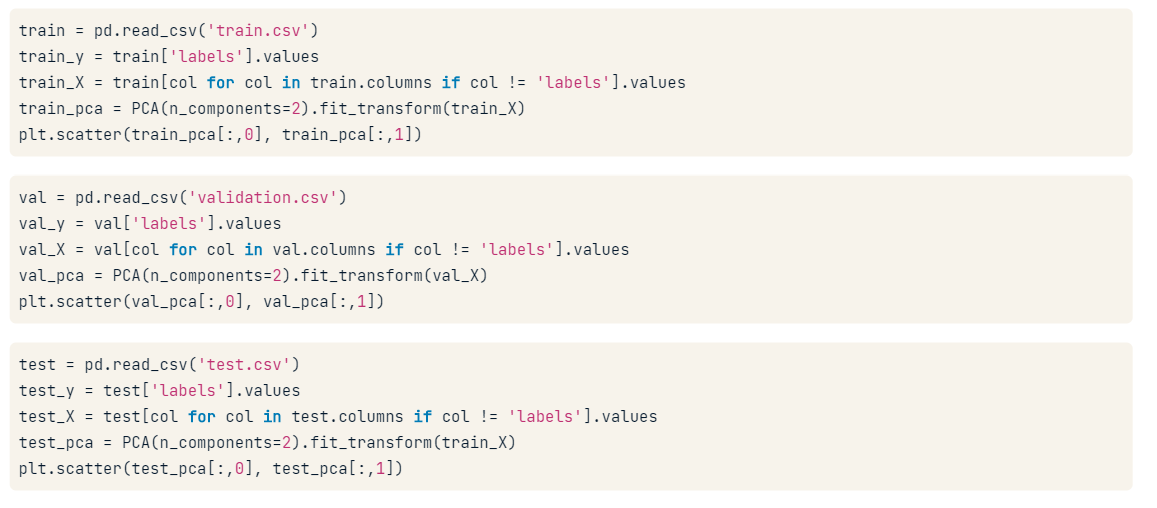

The problem with the copy and pasting approach is that errors are difficult to spot
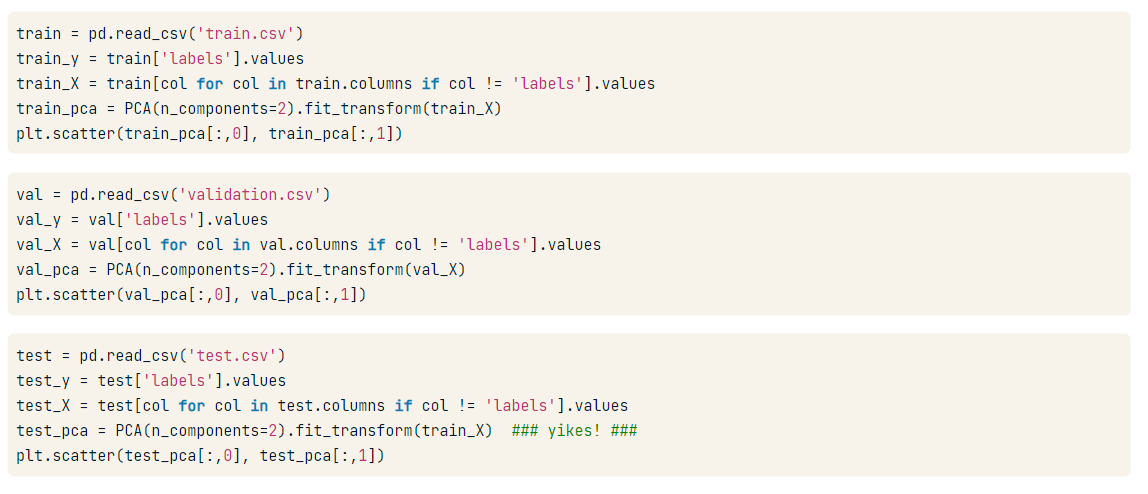

The other problem with repeated code is when a change is needed, it has to be done across all the copied code snippets. Repeating code like this is a good sign a function is a better choice. 

#### Use Functions to Avoid Repetion

Writing a function and calling that function to several times make it much easier to avoid the challenges of repeated code.  

In [ ]:
def load_and_plot(path):
    """Load a dataset and plot the first two principal components
     Args:
        path (str): the location of the CSV file
    
    Returns:
        tuple of ndarray: features and labels"""
   

    data = pd.read_csv(path)
    y = data['label'].values
    for col in data.columns:
        if col != 'id':
            x = data[col].values
    ca = PCA(n_components=2).fit_transform(x)
    plt.scatter(pac[:0], pac[:,1])

    return x, y

load_and_plot('train.csv')
load_and_plot('validation.csv')
load_and_plot('test.csv')
    

#### Do One Thing

But this function still violates another engineering principle by doing more than one thing, first it plots the data and then it returns the values of x and y. By breaking this function into two more nimble functions, one that first loads the data and sets the values of x and y and then create one that plots the data. Now the code is more flexible. If transformation to the data needs to be done before plotting, now it can be. 

##### Advantages of Doing One Thing

The code becomes:
> * More flexible <br>
> * More easily understood<br>
> * Simpler to test and debug<br>
> * Easier to change because it will be easier to predict what the impact the change will have on the one thing the function does

In [15]:
def load_data(path):
    '''Load a data set.
    
     Args:
        path (str): the location of the CSV file
    
    Returns:
        tuple of ndarray: features and labels'''
    
    data = pd.read_csv(path)
    y = data['label'].values
    for col in data.columns:
        if col != 'id':
            x = data[col].values
    return x, y

def plot_data(X):
    '''Plot the first two principal components of a matrix
    
    Args:
        X (numpy.ndarray): The data to plot'''
    
    ca = PCA(n_components=2).fit_transform(x)
    plt.scatter(pac[:0], pac[:,1])

### Code Smells and Refactoring

Repeated code and functions that do more than one thing are examples of code smells and are indications that the code needs to be refactored. Refactoring is the process of changing code a little bit at a time. Martin Fawler's book Refactoring is a good read. 

### Exercise 2

#### Extract a function
While you were developing a model to predict the likelihood of a student graduating from college, you wrote this bit of code to get the z-scores of students' yearly GPAs. Now you're ready to turn it into a production-quality system, so you need to do something about the repetition. Writing a function to calculate the z-scores would improve this code.

Note: df is a pandas DataFrame where each row is a student with 4 columns of yearly student GPAs: y1_gpa, y2_gpa, y3_gpa, y4_gpa

__Instructions:__
* Finish the function so that it returns the z-scores of a column.
* Use the function to calculate the z-scores for each year (df['y1_z'], df['y2_z'], etc.) from the raw GPA scores (df.y1_gpa, df.y2_gpa, etc.).

In [16]:
df = pd.read_csv('gpa.csv')

def standardize(column):
  """Standardize the values in a column.

  Args:
    column (pandas Series): The data to standardize.

  Returns:
    pandas Series: the values as z-scores
  """
  # Finish the function so that it returns the z-scores
  z_score = (column - column.mean()) / column.std()
  return z_score

# Use the standardize() function to calculate the z-scores
df['y1_z'] = standardize(df.y1_gpa)
df['y2_z'] = standardize(df.y2_gpa)
df['y3_z'] = standardize(df.y3_gpa)
df['y4_z'] = standardize(df.y4_gpa)

#### Split up a function
Another engineer on your team has written this function to calculate the mean and median of a list. You want to show them how to split it into two simpler functions: mean() and median().

__Instructions:__
* Write the mean() function.
* Write the median() function.

In [17]:
def mean_and_median(values):
  """Get the mean and median of a list of `values`

  Args:
    values (iterable of float): A list of numbers

  Returns:
    tuple (float, float): The mean and median
  """
  mean = sum(values) / len(values)
  midpoint = int(len(values) / 2)
  if len(values) % 2 == 0:
    median = (values[midpoint - 1] + values[midpoint]) / 2
  else:
    median = values[midpoint]

  return mean, median

def mean(values):
  """Get the mean of a list of values

  Args:
    values (iterable of float): A list of numbers

  Returns:
    float
  """
  # Write the mean() function
  mean = sum(values)/len(values)
  return mean

def median(values):
  """Get the median of a list of values

  Args:
    values (iterable of float): A list of numbers

  Returns:
    float
  """
  # Write the median() function
  midpoint = int(len(values) / 2)
  if len(values) % 2 == 0:
    median = (values[midpoint - 1] + values[midpoint]) / 2
  else:
    median = values[midpoint]

  return median

### Pass By Assignment

The way Python passes information to functions is different from the way other programming languages do it. In Python it is referred to as pass by assignment. In the example below, there is function foo which sets the first value of list to 99. When the my_list of 1, 2, 3 is passed to the foo function and the my_list is printed, the returned list will be 99, 2, 3 because lists in Python are mutable objects, meaning they can be changed. 

In a second function, bar, it accepts a variable and returns that variable + 90. When the my_var set equal to 3 is passed to the function bar and the my_var is then printed, it will still be set to 3. This is because in Python integars are immutable, meaning they can't be changed. 

In [1]:
def foo(x):
    x[0] = 99

my_list = [1,2,3]

foo(my_list)
print(my_list)

def bar(x):
    x = x + 90

my_var = 3

bar(3)
print(my_var)

[99, 2, 3]
3


#### Digging Deeper

When the variable a is set equal to the list 1,2,3, the Python interpreter establishes a to a specific location in memory, represented as the gray bar on the right. If the variable b is set to equal a, the interpreter defines b as pointing to the exact same place in memory that a is pointing to. This means that if 4 is appended to the variable a, both a and b will now have 4 added to the list as there is only one place in memory where the list is being stored and both a and b are pointing to that same location. Likewise, if b is appended with 5, then both a and b now have 5 in their list. However, if variable is then set to equal 42, which will be placed in a new part of the memory, it will not change what the variable b is pointing to, the list of 1,2,3,4,5 and things that are happening to the variable a are no longer happening to the variable b and vice versa.
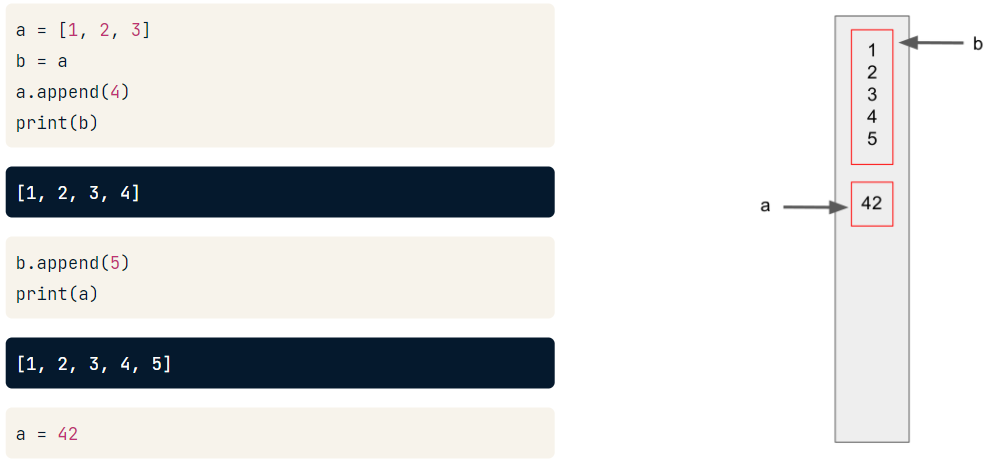

#### Passing By Assignment

The implication for how this applies to the functions foo and bar is that when my_list is created, it is provided a location in memory. When my_list is passed to the function foo, the foo parameter x gets assigned to the same location as my_list in memory.
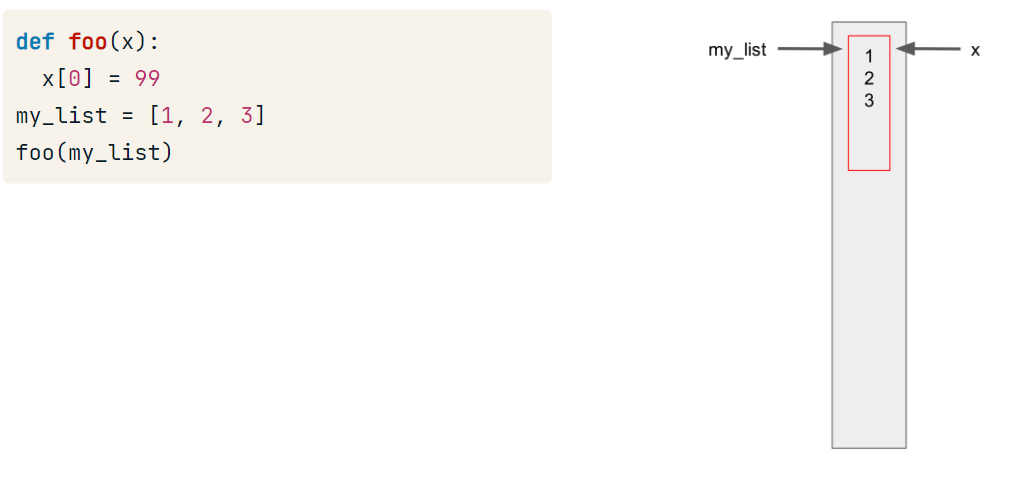

 This means that whatever the function modifies in x also modifies what my_list variable points to. 
 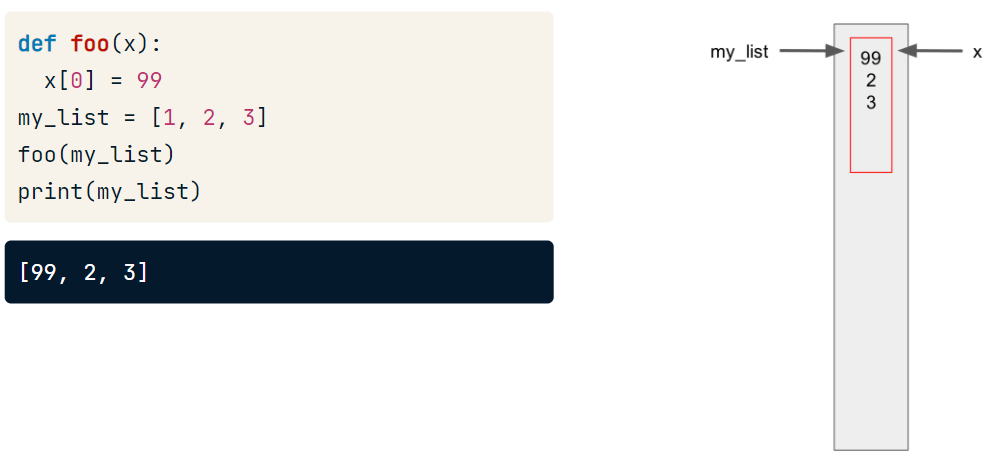

In the other example for the function bar, the variable my_var is set to 3 and points to a specific location in memory. 
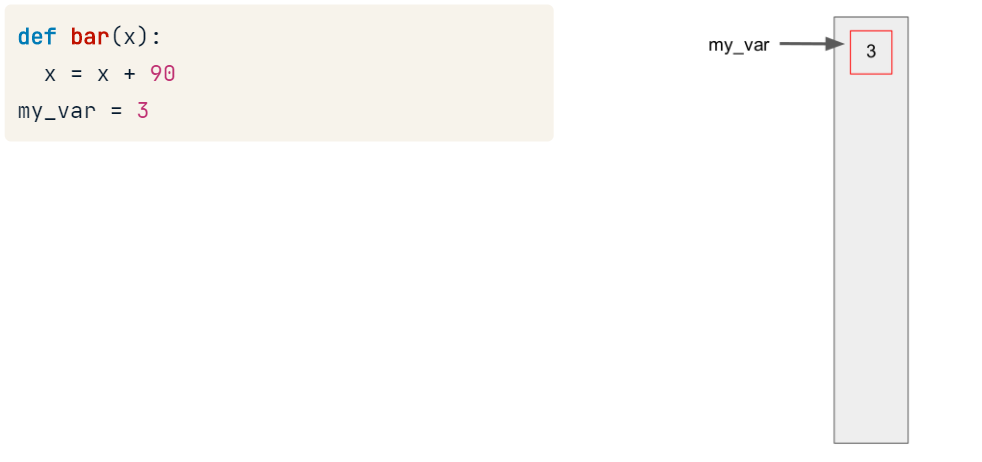

Then my_var was passed to the function bar which caused the variable x to point to the same location in memory as my_var.
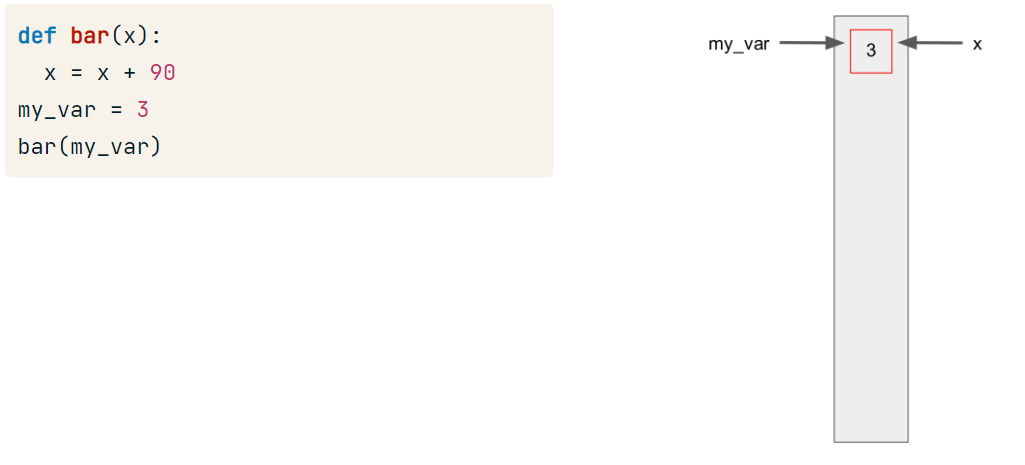

But the bar function assigns x to a new value so the my_var variable isn't touched and in fact there is no way in Python to have changed the variables x or my_var directly because integars are immutable variables. 
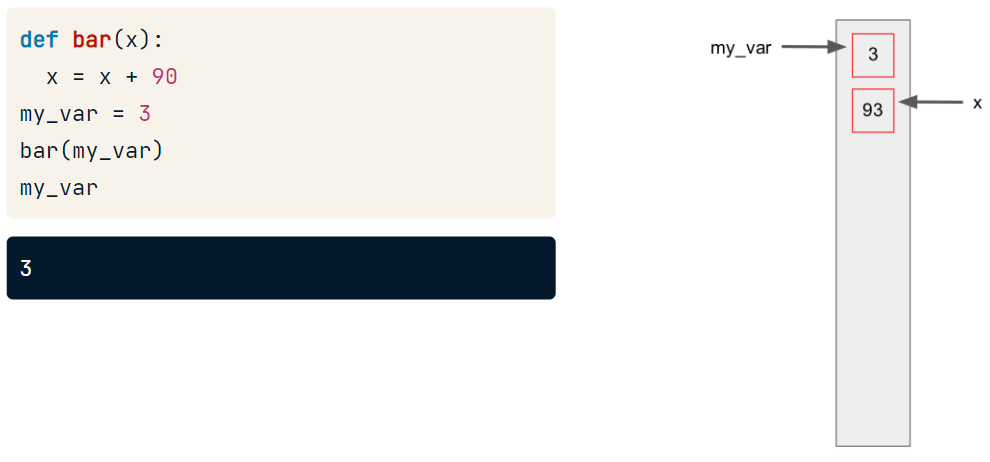

#### Immutable or Mutable?

__Immutable__
* int
* float
* bool
* string
* bytes
* tuple
* frozenset
* None

__Mutable__
* list
* dict
* set
* bytearray
* objects
* functions
* just about everything else!

#### Mutable Default Arguments are Dangerous

In the example below, foo is a function that appends the value 1 to the end of a list. But this function has an empty list as a default value. When foo is called the first time, it returns what is expected, a list with the value 1. When foo gets called a second time, the returned list now has 2 values of 1. If a mutable variable is needed for the default variable, it is better the set the default value to None and define the variable within the function. 

In [5]:
def foo(var=[]):
    var.append(1)
    return var

print(foo())
print(foo())

def foo(var=None):
    if var is None:
        var = []
    var.append(1)
    return var

print(foo())
print(foo())

[1]
[1, 1]
[1]
[1]


### Exercise 3

#### Best practice for default arguments
One of your co-workers (who obviously didn't take this course) has written this function for adding a column to a panda's DataFrame. Unfortunately, they used a mutable variable as a default argument value! Please show them a better way to do this so that they don't get unexpected behavior.
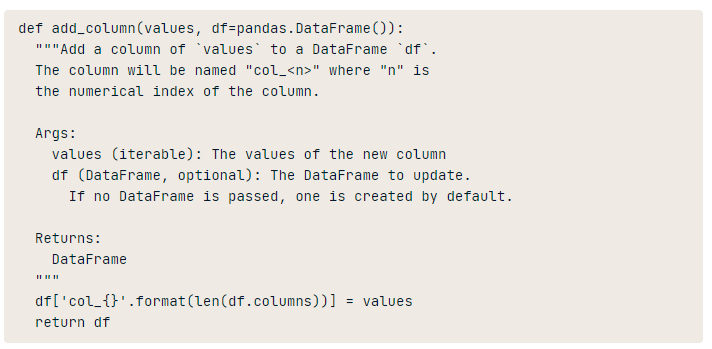
__Instructions:__
* Change the default value of df to an immutable value to follow best practices.
* Update the code of the function so that a new DataFrame is created if the caller didn't pass one.

In [7]:
# Use an immutable variable for the default argument 
def better_add_column(values, df=None):
  """Add a column of `values` to a DataFrame `df`.
  The column will be named "col_<n>" where "n" is
  the numerical index of the column.

  Args:
    values (iterable): The values of the new column
    df (DataFrame, optional): The DataFrame to update.
      If no DataFrame is passed, one is created by default.

  Returns:
    DataFrame
  """
  # Update the function to create a default DataFrame
  if df is None:
    df = pandas.DataFrame()
  df['col_{}'.format(len(df.columns))] = values
  return df